In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("datasets/car-sales.csv")

data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


#### Data discovery

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [4]:
data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

In [5]:
# low null values percentage can be deleted or replaced them with the mean

(data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)

drive           0.053363
engV            0.045322
car             0.000000
price           0.000000
body            0.000000
mileage         0.000000
engType         0.000000
registration    0.000000
year            0.000000
model           0.000000
dtype: float64

In [6]:
data["drive"] = data["drive"].fillna("unknown")

data["drive"].unique()

array(['full', 'rear', 'front', 'unknown'], dtype=object)

In [7]:
data["engV"] = data["engV"].fillna(data["engV"].mean())

data["engV"].isnull().sum()

0

In [8]:
data.duplicated().sum()

113

In [9]:
# price have unrealistic 0 values, replace them with the mean
# mimleage 0 values are possible if it's a new car

data.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9576.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.791801,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.646344,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [10]:
data["price"] = data["price"].replace(0, data["price"].mean())

data["car"][data["price"] == 0].count()

0

#### Lower column names

In [11]:
data.columns = map(str.lower, data.columns)

data.columns

Index(['car', 'price', 'body', 'mileage', 'engv', 'engtype', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

#### Date Analyze

##### Find most sold cars based on column

<Axes: xlabel='year'>

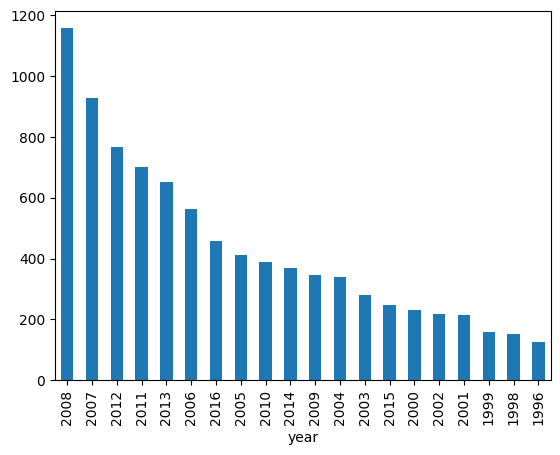

In [12]:
data["year"].value_counts().head(20).plot(kind = "bar")

<Axes: xlabel='body'>

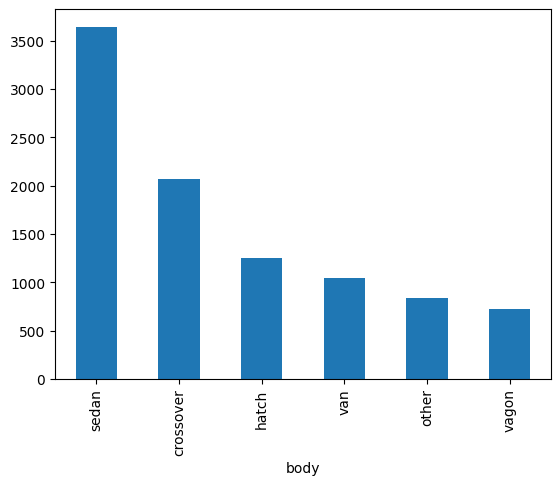

In [13]:
data["body"].value_counts().head(20).plot(kind = "bar")

<Axes: xlabel='car'>

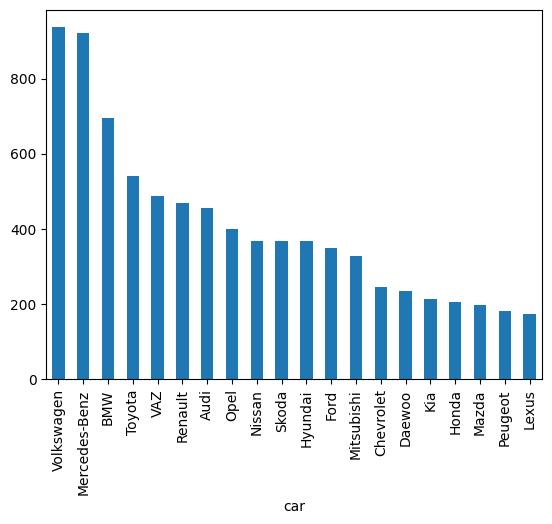

In [14]:
data["car"].value_counts().head(20).plot(kind = "bar")

Text(0.5, 0, '')

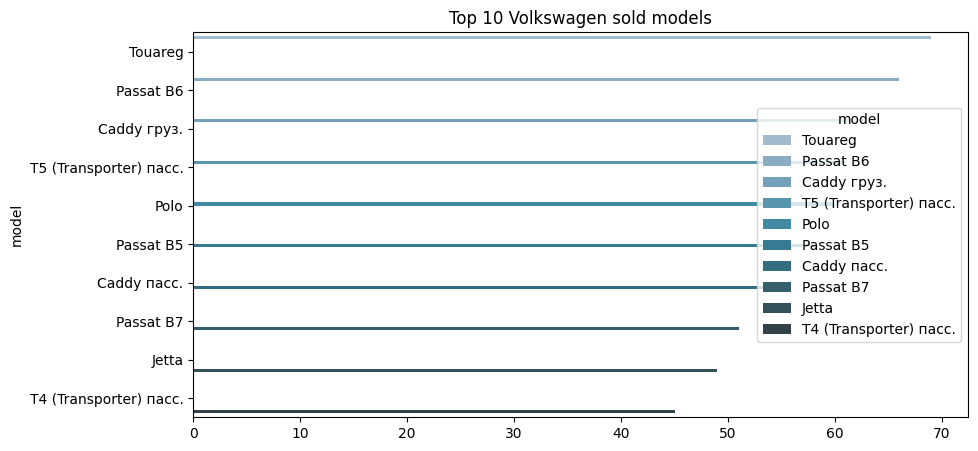

In [15]:
vw_data = data[data["car"] == "Volkswagen"]

vw_top_10_model = vw_data["model"].value_counts()[:10].reset_index(name = "count")

plt.figure(figsize = (10, 5))

sns.barplot(data = vw_top_10_model, y = "model", x = "count", hue = "model", palette = "PuBuGn_d")
plt.title("Top 10 Volkswagen sold models")
plt.xlabel("")

Text(0.5, 0, '')

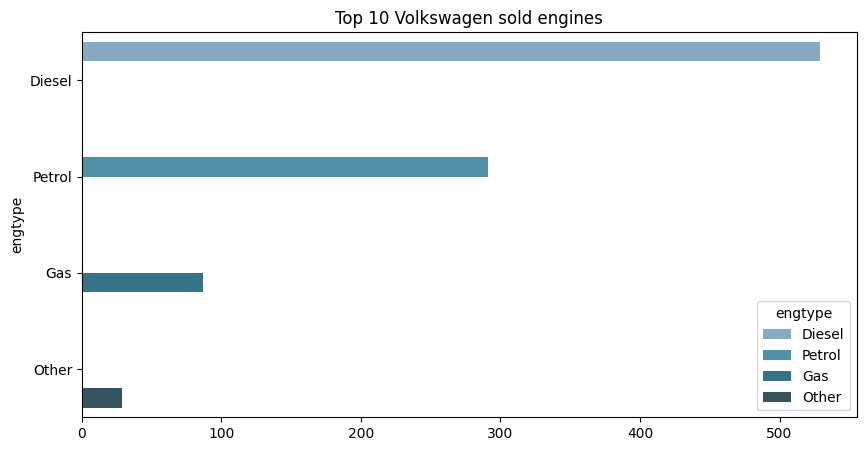

In [16]:
vw_top_10_engine = vw_data["engtype"].value_counts()[:10].reset_index(name = "count")

plt.figure(figsize = (10, 5))

sns.barplot(data = vw_top_10_engine, y = "engtype", x = "count", hue = "engtype", palette = "PuBuGn_d")
plt.title("Top 10 Volkswagen sold engines")
plt.xlabel("")


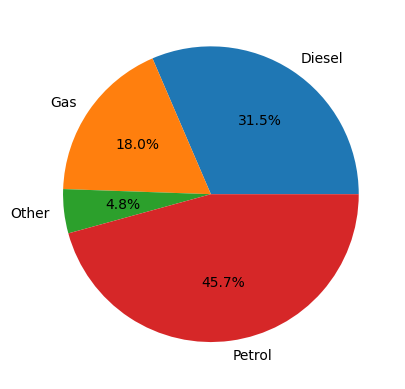

In [17]:
top_sold_engine = data.value_counts(data["engtype"].values, sort = False)
labels = top_sold_engine.index.to_list()

plt.pie(x = top_sold_engine, labels = labels, autopct = "%1.1f%%", startangle = 0)
plt.show()


<Axes: xlabel='mileage', ylabel='price'>

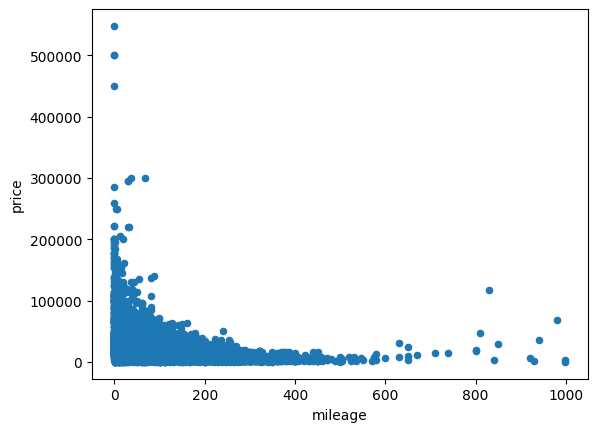

In [18]:
data.plot(kind = "scatter", x = "mileage", y = "price")

<Axes: xlabel='year', ylabel='price'>

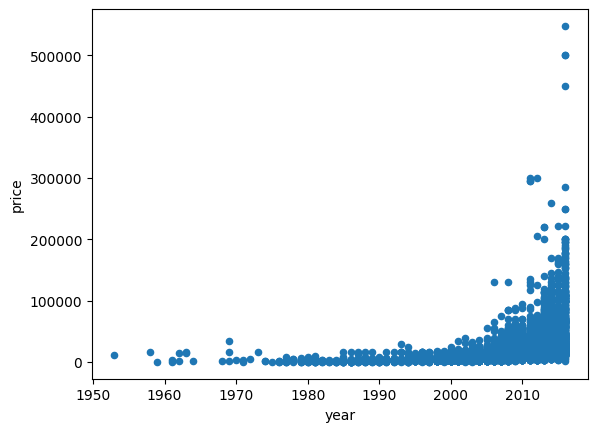

In [19]:
data.plot(kind = "scatter", x = "year", y = "price")

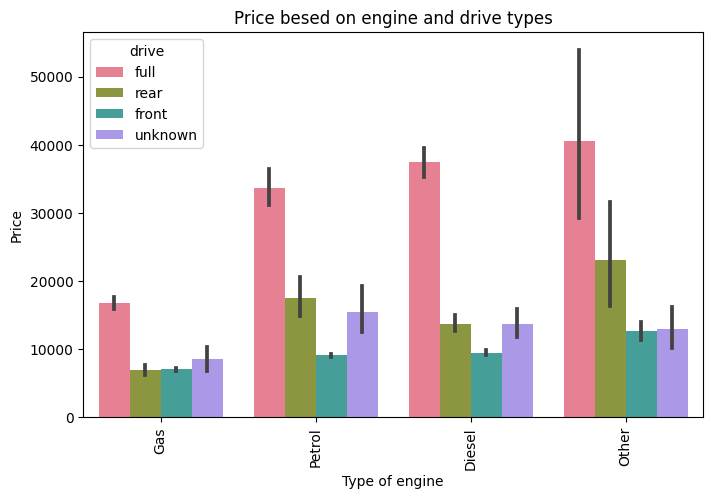

In [20]:
figure, axes = plt.subplots(figsize = (8, 5))

sns.barplot(data = data, x = "engtype", y = "price", hue = "drive", palette = "husl")
axes.set_title("Price besed on engine and drive types")
axes.xaxis.set_label_text("Type of engine")
axes.yaxis.set_label_text("Price")

ticks = plt.setp(axes.get_xticklabels(), rotation = 90)

##### Price based on car and mileage

In [21]:
# manually find the avg, instead we can use data["mileage"].mean()

mileage_avg = sum(data["mileage"] / len(data["mileage"]))

data["mileage_level"] = ["high" if i > mileage_avg else "low" for i in data["mileage"]]

data.sample(5)

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_level
8869,Honda,15200.0,other,90,3.5,Gas,yes,2008,Accord,front,low
6628,BMW,19900.0,other,95,4.5,Petrol,yes,2005,645,rear,low
3362,Volkswagen,12000.0,sedan,152,1.8,Petrol,yes,2008,Passat B6,front,high
1760,BMW,10000.0,sedan,274,4.4,Gas,yes,1998,540,rear,high
8939,Hyundai,20300.0,crossover,83,2.0,Diesel,yes,2011,IX35,full,low


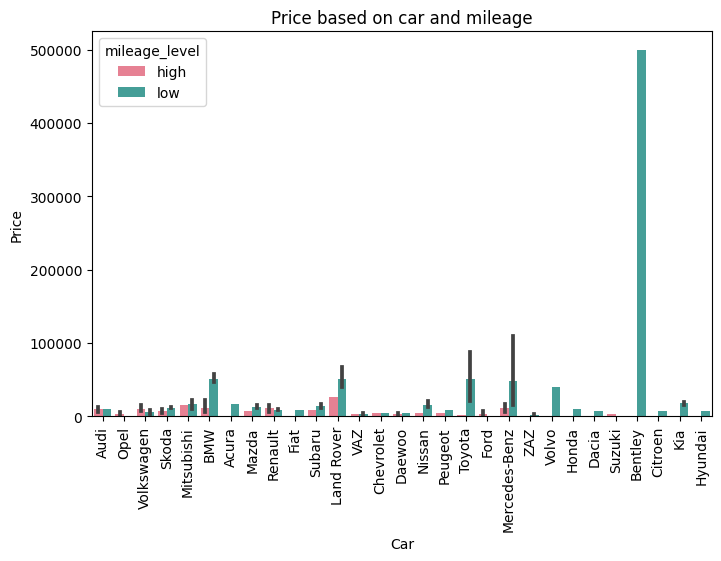

In [22]:
figure, axes = plt.subplots(figsize = (8, 5))

# too much unique entries for car
sample_data = data.sample(100)

sns.barplot(data = sample_data, x = "car", y = "price", hue = "mileage_level", palette = "husl")
axes.set_title("Price based on car and mileage")
axes.xaxis.set_label_text("Car")
axes.yaxis.set_label_text("Price")

ticks = plt.setp(axes.get_xticklabels(), rotation = 90)

In [23]:
# we can use data.corr("pearson", numeric_only = True) instead of creating a numeric columns 

numeric_data = data.loc[:, data.dtypes != "object"]
correlation = numeric_data.corr("pearson")

correlation

,price,mileage,engv,year
price,1.000000,-0.323532,0.051910,0.380048
mileage,-0.323532,1.000000,0.045642,-0.495599
engv,0.051910,0.045642,1.000000,-0.040742
year,0.380048,-0.495599,-0.040742,1.000000


<Axes: >

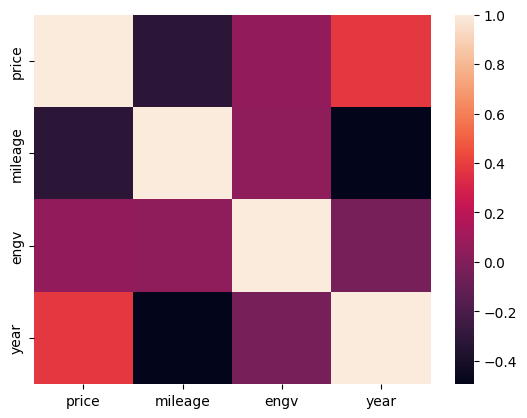

In [24]:
sns.heatmap(data = correlation, xticklabels = correlation.columns, yticklabels = correlation.columns)